### MACHINE LEARN, MODELANDO ALGORITMOS DE CLASIFICACION

### El próximo ejemplo modelaremos varios algoritmos de clasificación para compararlos entre sí a ver cuál es más eficiente en dependencia de la precisión de los mismos.
###  Algoritmos de clasificación:
###  Regresion logistica (LogisticRegression)
###  Vecinos mas cercanos (KNeighborsClassifier)
###  Máquinas de Vectores de Soporte (SVC)
###  Árboles de Decisión Clasifcación (DecisionTreeClassifier)

#### El problema a solucionar consiste en una serie de entradas correspondientes a trabajadores en función de las cuales podremos ser capaces de predecir si un trabajador es ausentista o no aplicando los modelos de clasificación anteriormente planteados.

### Referencia de Data set
### Nombre:  Absenteeism at work - Part I
### Abstract: The database was created with records of absenteeism at work from July 2007 to July 2010 at a courier company in Brazil.

### Link: https://archive.ics.uci.edu/ml/datasets/Absenteeism+at+work


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
%matplotlib inline

### Lectura de los datos  en este caso un fichero en formato  csv delimitado por ";"

In [2]:
df = pd.read_csv('Absenteeism_at_work.csv',delimiter=';')

## Proceso realiza un análisis y exploración de los datos

#### Mostrar analisis de los datos con las funciones info() y decribe()

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 740 entries, 0 to 739
Data columns (total 21 columns):
ID                                 740 non-null int64
Reason for absence                 740 non-null int64
Month of absence                   740 non-null int64
Day of the week                    740 non-null int64
Seasons                            740 non-null int64
Transportation expense             740 non-null int64
Distance from Residence to Work    740 non-null int64
Service time                       740 non-null int64
Age                                740 non-null int64
Work load Average/day              740 non-null float64
Hit target                         740 non-null int64
Disciplinary failure               740 non-null int64
Education                          740 non-null int64
Son                                740 non-null int64
Social drinker                     740 non-null int64
Social smoker                      740 non-null int64
Pet                          

In [4]:
df.describe()

,ID,Reason for absence,Month of absence,Day of the week,Seasons,Transportation expense,Distance from Residence to Work,Service time,Age,Work load Average/day,...,Disciplinary failure,Education,Son,Social drinker,Social smoker,Pet,Weight,Height,Body mass index,Absenteeism time in hours
count,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,...,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000
mean,18.017568,19.216216,6.324324,3.914865,2.544595,221.329730,29.631081,12.554054,36.450000,271.490235,...,0.054054,1.291892,1.018919,0.567568,0.072973,0.745946,79.035135,172.114865,26.677027,6.924324
std,11.021247,8.433406,3.436287,1.421675,1.111831,66.952223,14.836788,4.384873,6.478772,39.058116,...,0.226277,0.673238,1.098489,0.495749,0.260268,1.318258,12.883211,6.034995,4.285452,13.330998
min,1.000000,0.000000,0.000000,2.000000,1.000000,118.000000,5.000000,1.000000,27.000000,205.917000,...,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,56.000000,163.000000,19.000000,0.000000
25%,9.000000,13.000000,3.000000,3.000000,2.000000,179.000000,16.000000,9.000000,31.000000,244.387000,...,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,69.000000,169.000000,24.000000,2.000000
50%,18.000000,23.000000,6.000000,4.000000,3.000000,225.000000,26.000000,13.000000,37.000000,264.249000,...,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,83.000000,170.000000,25.000000,3.000000
75%,28.000000,26.000000,9.000000,5.000000,4.000000,260.000000,50.000000,16.000000,40.000000,294.217000,...,0.000000,1.000000,2.000000,1.000000,0.000000,1.000000,89.000000,172.000000,31.000000,8.000000
max,36.000000,28.000000,12.000000,6.000000,4.000000,388.000000,52.000000,29.000000,58.000000,378.884000,...,1.000000,4.000000,4.000000,1.000000,1.000000,8.000000,108.000000,196.000000,38.000000,120.000000


In [36]:

df.head()
# en este procedimiento exploramos nuestros datos para familiarizarnos con ellos y ver que tipo de datos son para
# modificarlos en caso de ser necesario a tipo de datos numericos ya que permiten mayor eficiencia en el modelaje y
# resultado del mismo

,ID,Reason for absence,Month of absence,Day of the week,Seasons,Transportation expense,Distance from Residence to Work,Service time,Age,Work load Average/day,...,Education,Son,Social drinker,Social smoker,Pet,Weight,Height,Body mass index,Absenteeism time in hours,absent
0,11,26,7,3,1,289,36,13,33,239.554,...,1,2,1,0,1,90,172,30,4,absent
1,36,0,7,3,1,118,13,18,50,239.554,...,1,1,1,0,0,98,178,31,0,not absent
2,3,23,7,4,1,179,51,18,38,239.554,...,1,0,1,0,0,89,170,31,2,absent
3,7,7,7,5,1,279,5,14,39,239.554,...,1,2,1,1,0,68,168,24,4,absent
4,11,23,7,5,1,289,36,13,33,239.554,...,1,2,1,0,1,90,172,30,2,absent


#### la siguiente grafica nos permite visualizar la correlacion que existe entre df["Absenteeism time in hours"] y df["Disciplinary failure"]

/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


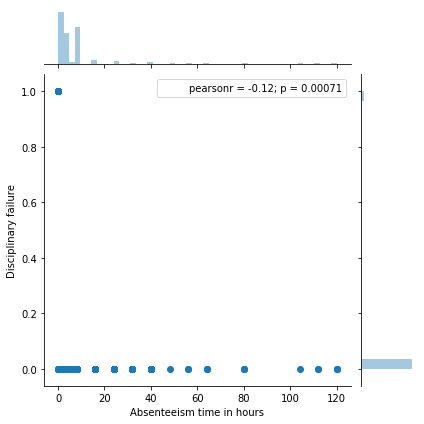

In [34]:
sb.jointplot(df["Absenteeism time in hours"],df["Disciplinary failure"])

#### a continuación se crea la columna target en dependencia de las horas de ausencia de los trabajadores, si un trabajador no tiene ausencias se etiqueta como "not absent" y de manera contraria se etiqueta como ausentista. para ello creamos una función la cual se le aplica a los valores df["Absenteeism time in hours"] 

In [7]:
def create_absent(x):
    if x == 0:
        return "not absent"
    else:
        return "absent"

In [8]:
df["absent"] = df["Absenteeism time in hours"].apply(lambda x: create_absent(x)) 

In [35]:
print("\n")
df.columns ## visualizamos las columnas para  definir las entradas que seran asignadas a la variable X 

Index(['ID', 'Reason for absence', 'Month of absence', 'Day of the week',
       'Seasons', 'Transportation expense', 'Distance from Residence to Work',
       'Service time', 'Age', 'Work load Average/day ', 'Hit target',
       'Disciplinary failure', 'Education', 'Son', 'Social drinker',
       'Social smoker', 'Pet', 'Weight', 'Height', 'Body mass index',
       'Absenteeism time in hours', 'absent'],
      dtype='object')

## Modelaremos a continuación los  algoritmos de clasificación enunciados en la introducción

#### de finimos la variable target es decir "y" la cual creamos anteriormente para predecir nuestro modelo y la variable "X" la cual representan nuestras entradas

In [10]:
y = df['absent']
X = df[['Reason for absence', 'Month of absence', 'Day of the week',
       'Seasons', 'Transportation expense', 'Distance from Residence to Work',
       'Service time', 'Age', 'Work load Average/day ', 'Hit target',
       'Disciplinary failure', 'Education', 'Son', 'Social drinker',
       'Social smoker', 'Pet', 'Weight', 'Height', 'Body mass index',
       'Absenteeism time in hours']]

#### se dividen los datos en datos para prueba y entrenamiento

In [11]:
from sklearn.cross_validation import train_test_split

/anaconda3/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)

#### se importan las librerias sklearn para implementar los modelor de clasificación para ver cual es el que mejor resultado arroja

In [13]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier,export_graphviz

#### se importa las librerias para las metricas de los modelos

In [14]:
from sklearn.metrics import classification_report,confusion_matrix

#### modelaje de Rregresión Logistica primero se crea el modelo

In [15]:
regresion_logistica = LogisticRegression()

#### se procede a entrenar el modelo con la función fit a la cual se le pasa como parametros los valores de entrenamient X_train y y_train

In [16]:
regresion_logistica.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

#### posteriormente entrenado el modelo se realiza la predicción del mismo

In [17]:
prediccion_regLogistic=regresion_logistica.predict(X_test)

#### luego ya podemos generar los reporte de clasificacion

In [18]:

print("\n")
confusion_matrix(y_test,prediccion_regLogistic)


array([[143,   0],
       [  0,   5]])

In [19]:
print("\n")
print(classification_report(y_test,prediccion_regLogistic))



             precision    recall  f1-score   support

     absent       1.00      1.00      1.00       143
 not absent       1.00      1.00      1.00         5

avg / total       1.00      1.00      1.00       148



In [37]:
print("El modelo de regresión logistica tiene una presición de:",regresion_logistica.score(X_test,y_test))

El modelo de regresión logistica tiene una presición de: 1.0


### Modelar el algoritmo de vecinos mas cercanos KNN

In [21]:
vecinos_cercanos = KNeighborsClassifier(n_neighbors=50)

#### entrenando el algoritmo con la funcion fit()

In [22]:
vecinos_cercanos.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=50, p=2,
           weights='uniform')

#### una vez entrenado el algoritmo se realiza la prediccion del mismo

In [23]:
predict_KNN = vecinos_cercanos.predict(X_test)

#### posteriormente se puede generar los reportes para ver la confiabilidad que arroja este modelo 

In [24]:
print("Reporte de clasificacion del modelo vecinos mas cercanos")
print(classification_report(y_test,predict_KNN))
print("\n")
print("Reporte de confusion matrix")
print(confusion_matrix(y_test,predict_KNN))
print("La precision del modelo vecinos cercanos es de:",vecinos_cercanos.score(X_train,y_train).round(2))

Reporte de clasificacion del modelo vecinos mas cercanos
             precision    recall  f1-score   support

     absent       0.97      1.00      0.98       143
 not absent       0.00      0.00      0.00         5

avg / total       0.93      0.97      0.95       148



Reporte de confusion matrix
[[143   0]
 [  5   0]]


/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


La precision del modelo vecinos cercanos es de: 0.93


#### modelado de algoritmo de clasificacion SVC


In [25]:
svc_model = SVC()

#### se procede al entrenamiento del modelo con la funcion fit() las cual se le pasa como parametros los datos de entrenamiento

In [26]:
svc_model.fit(X_train, y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

#### luego de haber entrenado el modelo se procede a predecir el mismo con la función predict() pasandole como parametros los valores de prueva

In [27]:
predict_svc = svc_model.predict(X_test)

#### ya en este punto podemos sacar los reportes y evaluar las metricas del modelo que permiten valorar la efectividad del mismo que permitan compararlo con otros modelos de clasificación

In [39]:
print("Reporte de clasificacion del modelo SVC")
print(classification_report(y_test,predict_svc))
print(confusion_matrix(y_test,predict_svc))
print("El modelo SVC tiene una precisión de:", svc_model.score(X_train,y_train).round(2))

Reporte de clasificacion del modelo SVC
             precision    recall  f1-score   support

     absent       0.97      1.00      0.98       143
 not absent       0.00      0.00      0.00         5

avg / total       0.93      0.97      0.95       148

[[143   0]
 [  5   0]]
El modelo SVC tiene una precisión de: 1.0


/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


### Modelaje del algoritmo arbol de clasificación 

In [29]:
modelo_arbol = DecisionTreeClassifier()

#### entrenamos el modelo pasandole los datos de entrenamiento X_train y y_train a la funcion fit() 

In [30]:
modelo_arbol.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

#### una vez entrenado el modelo procedemos a calcular la predicción del mismo utilizando la función predict() la cual se le pasa los datos te prueba es decir X_test

In [31]:
predict_arbol= modelo_arbol.predict(X_test)

#### posteriormente podemos generar los reportes que arroja el modelaje del algoritmo 

In [40]:
print("Reportes del modelo arbol de clasificación")
print(classification_report(y_test, predict_arbol))# se le pasa el target de prueba y la prediccion del algoritmo
print("\n")
print("Matrix de confusion")
print(confusion_matrix(y_test, predict_arbol))
print("La presición del modelo arbol de clasificación es de:", modelo_arbol.score(X_train, y_train))

Reportes del modelo arbol de clasificación
             precision    recall  f1-score   support

     absent       1.00      1.00      1.00       143
 not absent       1.00      1.00      1.00         5

avg / total       1.00      1.00      1.00       148



Matrix de confusion
[[143   0]
 [  0   5]]
La presición del modelo arbol de clasificación es de: 1.0


In [33]:
export_graphviz(modelo_arbol, out_file="tree.dot")

### A modo de resumen de este ejercicio realizamos uno comparativa entre las precisiones de los diferentes modelos lo cual nos permite seleccionar cual de ellos implementaremos.

In [41]:
print("La presición del modelo arbol de clasificación es de:", modelo_arbol.score(X_train, y_train))
print("El modelo SVC tiene una precisión de:", svc_model.score(X_train,y_train).round(2))
print("La precision del modelo vecinos cercanos es de:",vecinos_cercanos.score(X_train,y_train).round(2))
print("El modelo de regresión logistica tiene una presición de:",regresion_logistica.score(X_test,y_test))

La presición del modelo arbol de clasificación es de: 1.0
El modelo SVC tiene una precisión de: 1.0
La precision del modelo vecinos cercanos es de: 0.93
El modelo de regresión logistica tiene una presición de: 1.0
